In [3]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights
from torchvision.io import read_image
import torch

person_int = read_image('../data/running_man.jpg')

weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

person_float = transforms(person_int)

model = keypointrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model([person_float])
print(outputs)

[{'boxes': tensor([[169.2183,  22.9936, 526.2032, 583.6304]], grad_fn=<StackBackward0>), 'labels': tensor([1]), 'scores': tensor([0.9999], grad_fn=<IndexBackward0>), 'keypoints': tensor([[[259.5047,  93.3855,   1.0000],
         [269.4903,  83.3890,   1.0000],
         [259.5047,  82.5560,   1.0000],
         [300.2792,  87.5543,   1.0000],
         [302.7756,  87.5543,   1.0000],
         [316.9218, 139.2028,   1.0000],
         [290.2936, 145.8671,   1.0000],
         [392.6459, 181.6879,   1.0000],
         [283.6365, 230.8374,   1.0000],
         [336.0609, 219.1748,   1.0000],
         [242.0299, 203.3470,   1.0000],
         [308.6005, 281.6529,   1.0000],
         [334.3966, 289.9833,   1.0000],
         [243.6941, 404.9430,   1.0000],
         [385.1567, 414.9395,   1.0000],
         [241.1978, 541.5618,   1.0000],
         [481.6841, 503.2419,   1.0000]]], grad_fn=<CopySlices>), 'keypoints_scores': tensor([[18.7858, 19.4874, 16.9132, 16.6441,  6.9566, 11.3788,  5.7025, 15.3560

In [5]:
kpts = outputs[0]['keypoints']
scores = outputs[0]['scores']

print(kpts)
print(scores)

detect_threshold = 0.75
idx = torch.where(scores > detect_threshold)
keypoints = kpts[idx]

print(keypoints)

tensor([[[259.5047,  93.3855,   1.0000],
         [269.4903,  83.3890,   1.0000],
         [259.5047,  82.5560,   1.0000],
         [300.2792,  87.5543,   1.0000],
         [302.7756,  87.5543,   1.0000],
         [316.9218, 139.2028,   1.0000],
         [290.2936, 145.8671,   1.0000],
         [392.6459, 181.6879,   1.0000],
         [283.6365, 230.8374,   1.0000],
         [336.0609, 219.1748,   1.0000],
         [242.0299, 203.3470,   1.0000],
         [308.6005, 281.6529,   1.0000],
         [334.3966, 289.9833,   1.0000],
         [243.6941, 404.9430,   1.0000],
         [385.1567, 414.9395,   1.0000],
         [241.1978, 541.5618,   1.0000],
         [481.6841, 503.2419,   1.0000]]], grad_fn=<CopySlices>)
tensor([0.9999], grad_fn=<IndexBackward0>)
tensor([[[259.5047,  93.3855,   1.0000],
         [269.4903,  83.3890,   1.0000],
         [259.5047,  82.5560,   1.0000],
         [300.2792,  87.5543,   1.0000],
         [302.7756,  87.5543,   1.0000],
         [316.9218, 139.2028,  

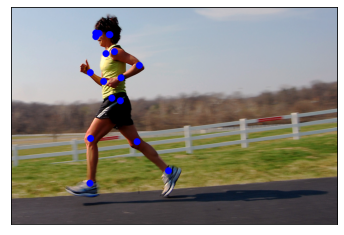

In [8]:
from torchvision.utils import draw_keypoints

import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

res = draw_keypoints(person_int, keypoints, colors="blue", radius=10)
show(res)

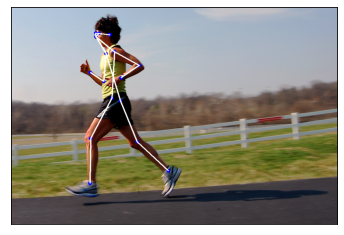

In [9]:
connect_skeleton = [
    (0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (6, 8),
    (7, 9), (8, 10), (5, 11), (6, 12), (11, 13), (12, 14), (13, 15), (14, 16)
]

res = draw_keypoints(person_int, keypoints, connectivity=connect_skeleton, colors="blue", radius=5, width=4)
show(res)